In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib as mpl
# remove top and right axis from plots
# mpl.rcParams["axes.spines.right"] = False
# mpl.rcParams["axes.spines.top"] = False

# remove all edges
# mpl.rcParams["axes.edgecolor"] = "none"

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

In [2]:
def get_log_probs(event_path):
    event_acc = EventAccumulator(str(event_path))
    event_acc.Reload()
    # print(event_acc.Tags()) # Show all tags in the log file

    _, step_nums, training_log_probs = zip(*event_acc.Scalars('training_log_probs'))
    _, _, validation_log_probs = zip(*event_acc.Scalars('validation_log_probs'))
    _, _, best_validation_log_prob = zip(*event_acc.Scalars('best_validation_log_prob'))
    return step_nums, training_log_probs, validation_log_probs, best_validation_log_prob

In [3]:
!pwd
!ls ../src/train/logs

/home/wehe/tmp/NSC/codes/notebook
log-test  logs_L0_v1   train_L0_rnn	 train_L0_rnn_npe_parallel
log_test  logs_L0_v1_  train_L0_rnn_npe


In [4]:
import os
# the log path
log_dir = Path('../src/train/logs/train_L0_rnn_npe/a0')
# print the files in the log path
for root, dirs, files in os.walk(log_dir):
    for name in files:
        if name.startswith('events.out.tfevents'):
            event_path = os.path.join(root, name)
print('event file path:')
print(event_path)

event_acc = EventAccumulator(str(event_path))
event_acc.Reload()
print(event_acc.Tags()) # Show all tags in the log file

event file path:
../src/train/logs/train_L0_rnn_npe/a0/events.out.tfevents.1681673520.snnmonster.2214600.0
{'images': [], 'audio': [], 'histograms': [], 'scalars': [], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [5]:
step_nums, training_log_probs, validation_log_probs, best_validation_log_prob = get_log_probs(event_path)
best_validation_log_prob = max(training_log_probs)

fig, ax = plt.subplots(figsize=(7,5))
plt.plot(step_nums, training_log_probs, label='train_log_probs')
plt.plot(step_nums, validation_log_probs, label=f'valid_log_probs (best {best_validation_log_prob:.2f})')
plt.plot(run_collect, valid_prob_collect, 'o', label='valid_log_probs (last)')
plt.legend()
plt.title(title)
plt.xlabel('epochs')
plt.ylabel('log_probs')
plt.grid(alpha=0.2)
plt.ylim([-1, 0.3])

KeyError: 'Key training_log_probs was not found in Reservoir'

## plot x_o

In [6]:
import sys
sys.path.append('../src')
import os
os.chdir('../')

In [ ]:
from dataset.get_xo import get_xo
from config.load_config import load_config
config = load_config(
    config_simulator_path=Path('./src/config') / 'test' / 'test_simulator.yaml',
    config_dataset_path=Path('./src/config') / 'test' / 'test_dataset.yaml',
    config_train_path=Path('./src/config') / 'test' / 'test_train.yaml',
)

In [ ]:
x_o = get_xo(
        subject_id          = config['x_o']['subject_id'],
        chosen_dur_list     = config['x_o']['chosen_dur_list'],
        chosen_MS_list      = config['x_o']['chosen_MS_list'],
        seqC_sample_per_MS     = config['x_o']['seqC_sample_per_MS'],
        trial_data_path     = config['x_o']['trial_data_path'],
        
        seqC_process_method = config['dataset']['seqC_process'],
        nan2num             = config['dataset']['nan2num'],
        summary_type        = config['dataset']['summary_type'],
    )


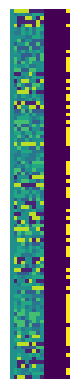

In [82]:
for i in range(21):
    img = plt.imshow(x_o[i*100:(i+1)*100,:])
    plt.axis('off')
    plt.savefig(f'./src/train/logs/train_L0_rnn/a0/x_o/x_o_{i}.png', bbox_inches='tight', pad_inches=0)

## plot memory usage

[782.0,
 782.0,
 782.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 782.0,
 782.0,
 782.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1164.0,
 782.0,
 782.0,
 1308.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1164.0,
 782.0,
 782.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1164.0,
 782.0,
 782.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1164.0,
 1164.0,
 782.0,
 782.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1164.0,
 782.0,
 782.0,
 1308.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,
 1328.0,

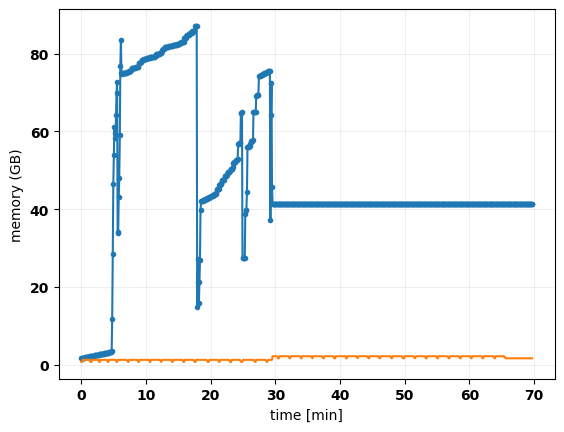

In [53]:

resource_usage_dir = log_dir / 'resource_usage.log'
# load log file
with open(resource_usage_dir, 'r') as f:
    lines = f.readlines()
# get the memory usage
memory_usage = [float(line.split('|')[:][1][5:-4]) for line in lines[1:]]
memory_usage_GPU = [float(line.split('|')[:][2].split('-')[1][1:-16])/1024 for line in lines[1:]]
time_min = [float(line.split('|')[:][0][:-5]) for line in lines[1:]]
plt.figure()
plt.plot(time_min, memory_usage, '.-', label='CPU')
plt.plot(time_min, memory_usage_GPU, '-', label='GPU')
plt.ylabel('memory (GB)')
plt.xlabel('time [min]')
plt.grid(alpha=0.2)
    

5min: processing sampling shuffle

20min: appending to simulation

30min: training

In [ ]:
# remove 